---
---
---
# **Building A Shallow Neural Network From Scratch:** 
  
## ***A Planar Data Classification With Size $n_h$ Hidden Layer***
#### **Data Scientist: Spencer Long** 

![Banner](https://www.air-worldwide.com/siteassets/airimages/blog/banner/machine_learning_life_insurance_banner.gif)


#### **Abstract:** 
I recently was tasked with leading the SNR Analytics team to build a Shallow Neural Network(SNN) to help predict if a patient should receive Immunotherapy treatment using a 3 gene signature we found using the JAMMIT Algorithm. I know we can easily implement a SNN using Tensor Flow or other various libraries quickly and efficiently. Yet, to make sure I had a good understanding of how a shallow NN functions and to fully grasp the mathematics behind one I dove deep by building a SNN from scratch using Python. You will see below a thorough explanation of what exactly a SNN is and how to implement one step by step from the ground up.

#### **You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation

---
---
---

# ***1 - Dependencies:***

**Note:**
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

In [26]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import * # imports functions from testCases-v2.py document
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets  # imports functions from testCases-v2.py document

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

---
---
---
# ***2 - Data:***

### **2.1 - Creating The Data**

The following code will load a "flower" 2-class dataset into variables X and Y. X will be our features (x and y coordinates) and Y will be our labels (red or blue aka 0 or 1). 

In [27]:
X, Y = load_planar_dataset() # Uses pre written function from the planr_utils.py file to generate a data set. 

### **2.2 - Getting A Feel For The Data**

In [28]:
type(X) # Confirming the data is in a numpy array

numpy.ndarray

In [29]:
X.shape # Shape of X variables: 400 rows by 2 columns 

(2, 400)

In [30]:
type(Y) # Confirming the data is in a numpy array

numpy.ndarray

In [31]:
Y.shape # Shape of Y variables: 400 rows by 1 column

(1, 400)

In [32]:
# Number of rows of training data
m = X.shape[1]

print ('We have m = %d training examples' % (m))

We have m = 400 training examples


| Data Dimensions          |
|--------------------------|
|    Shape of X (Features) = (2, 400)   |
|    Shape of Y (Labels) = (1, 400)   |
| $m$ (number of rows or training examples) = 400 |

### **2.3 - Getting A Visual Of The Data**

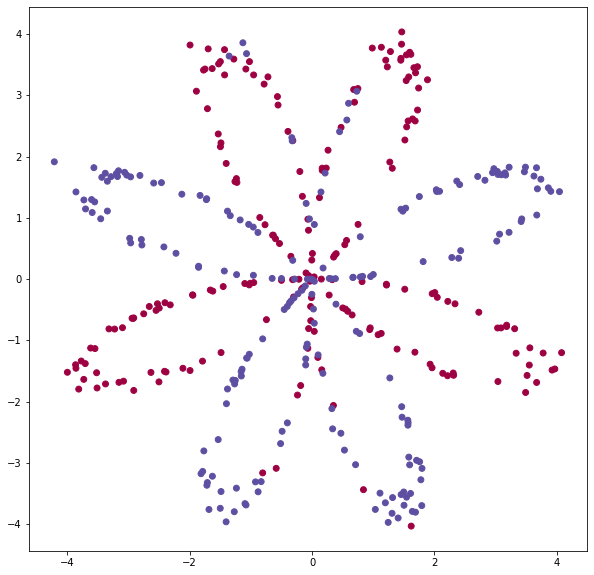

In [33]:
# Visualize the data: Plotting the two training sets. 
plt.figure(figsize=(10,10))
plt.scatter(X[0, :], X[1, :], c=Y, s=35,  cmap=plt.cm.Spectral);

The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. 
  
Thus what we have is:

- a numpy-array (matrix) X that contains your features (x1, x2)
- a numpy-array (vector) Y that contains your labels (red:0, blue:1).

**Goal:** Our goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue. 

---
---
---
# ***3 - Simple Logistic Regression:***

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [34]:
# Train the logistic regression classifier
classifier = sklearn.linear_model.LogisticRegressionCV();
classifier.fit(X.T, Y.T);

/Users/Spencer/miniconda3/envs/classUHenv/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Spencer/miniconda3/envs/classUHenv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


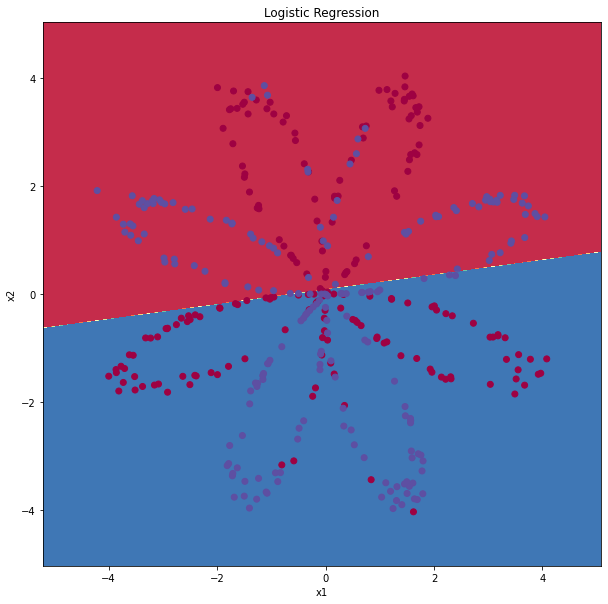

In [35]:
# Plot the decision boundary for logistic regression
plt.figure(figsize=(10,10))
plt.title("Logistic Regression")
plot_decision_boundary(lambda x: classifier.predict(x), X, Y)

# Print accuracy
LR_predictions = classifier.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

---
---
---
# ***4 - Neural Network Model***

Logistic regression did not work well on the "flower dataset". We are going to train a two layer Neural Network with a single hidden layer. Note the input layer is not formerly counted as a layer thus we technically have a three layer NN but the input layer can be thought of as layer 0. 

### **Here is our model**:  

**Activation functions:**

First Layer (hidden layer): $Tanh$ with four nodes  
Output Layer: $Sigmoid$
  
<img src="Images/shallow_nn_diagram.png">

### **Mathematically**:

#### For one example $x^{(i)}$:
#### $$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
#### $$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
#### $$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
#### $$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
#### $$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

#### Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
#### $$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:

    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learned the right parameters, you can make predictions on new data.

### **4.1 - Defining the neural network structure**

Implement the function `layer_sizes()`:

**Define three variables:**
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer


In [36]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    ### START CODE HERE ### (≈ 3 lines of code)
    n_x = X.shape[0] # size of input layer
    n_h = 4 # size of hidden layer
    n_y = Y.shape[0] # size of output layer
    ### END CODE HERE ###
    return (n_x, n_h, n_y)

In [37]:
layer_sizes(X, Y)

(2, 4, 1)

This function now returns the structure of the input, hidden, and outpuy layers of the NN. 

### **4.2 - Initialize the model's parameters**

Implement the function `initialize_parameters()`:


- We will initialize the weights matrices with random values.
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b). Standard normal distribution is used to generate numbers. 
- We will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [38]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(2) #set a seed so that the results are consistent although the initialization is random.
    
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    ### END CODE HERE ###
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [39]:
n_x, n_h, n_y = layer_sizes(X, Y)
initialize_parameters(n_x, n_h, n_y)

{'W1': array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]), 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]), 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]), 'b2': array([[0.]])}

### **4.3 - Forward Propagation** 

Implement the function `forward_propagation()`.

- Use the function `sigmoid()`. It is a built-in function (imported) in the notebook and is assigned as $\sigma(x) = \frac{1}{1+e^{-x}}$. It can be found in the `planar_utils.py` document. 
- Use the function `np.tanh()`. It is part of the numpy library.
- The steps we have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function later on.

#### **Mathematically**:

#### For one example $x^{(i)}$:
#### $$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
#### $$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
#### $$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
#### $$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$

In [40]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

### **4.4 - The Cost Function**

Implement the `compute_cost()` to compute the value of the cost $J$.

Now that we have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, we can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{6}$$

**Note:**

There are many ways to implement the cross-entropy loss. One method of solving for
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$ using python is:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).  
Note that if you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  We can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). We can cast the array as a type `float` using `float()`.

In [41]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (6)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (6)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    ### START CODE HERE ### (≈ 2 lines of code)
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1 - A2),1 - Y)
    cost = - np.sum(logprobs) * (1 / m) 
    ### END CODE HERE ###
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

### **4.5 - Backward Propagation**

Implement the function `backward_propagation()`.

Using the cache computed during forward propagation, you can now implement backward propagation.

Backpropagation is usually the hardest (most mathematical) part in deep learning. We will use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="Images/grad_summary.png">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- **Note:**
    - To compute dZ1 we will need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$. Thus we can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [42]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
        
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    # 6 lines of code, corresponding to 6 equations on slide above.
    dZ2= A2 - Y
    dW2 = 1 / m *(np.dot(dZ2,A1.T))
    db2 = 1 / m *(np.sum(dZ2,axis = 1,keepdims = True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1, 2))
    dW1 = 1 / m *(np.dot(dZ1,X.T))
    db1 = 1 / m *(np.sum(dZ1,axis = 1,keepdims = True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

### **4.6 - The Update Rule** 

Implement the update rule by building the functiom `update_parameters`. We will do this by conducting gradient descent. We will use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $$ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }\tag{7}$$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.




In [43]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above in equation (7)
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    # Update rule for each parameter
    W1 = W1 - np.multiply(learning_rate,dW1)
    b1 = b1 - np.multiply(learning_rate,db1)
    W2 = W2 - np.multiply(learning_rate,dW2)
    b2 = b2 - np.multiply(learning_rate,db2)
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

### **4.7 - Integrate parts 4.1, 4.2, 4.3, 4.4, 4.5, and 4.6 into a Nueral Network Model** 

Now we can build our neural network model by implementing the function called `nn_model()`. We will use all of the functions we have built above and adpat them into one single function we can use. 



In [44]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # For Loop (gradient descent)
    for i in range(0, num_iterations):
         
        ### START CODE HERE ### (≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache". 
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A2, Y)
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

### **4.8 - Making Predictions**

We will now use our model to predict by implementing the function `predict()`. We will thus compute probabilities using forward propagation, and classifing to 0/1 using 0.5 as the threshold.

Predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [45]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

In [46]:
X.shape

(2, 400)

In [47]:
Y.shape

(1, 400)

---
---
---
# ***5 - The Moment of Truth***

### **5.1 - Running the model**

It is now time to run our model and see how it performs on a planar dataset.

Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219456
Cost after iteration 9000: 0.218558


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

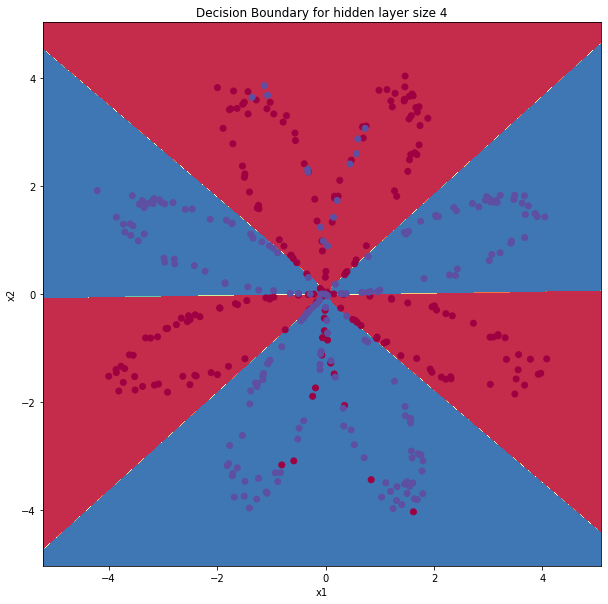

In [48]:
# Build a model with a n_h-dimensional hidden layers
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plt.figure(figsize=(10,10))
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

### **5.2 - Accuracy**

Equation used to calculate accuracy: $$\frac{Y\cdot predictions^{T} + (1-Y)\cdot (1-predictions^{T})}{Y_{size}}*100$$

In [49]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


The accuracy is really high compared to Logistic Regression we did in section 3. The model has learned and predicted the leaf patterns of the flower quite well. We must note that Neural networks are able to learn even highly non-linear decision boundaries, unlike the logistic regression as we saw previously. 

### **5.3 - Tuning hidden layer size**

The following code may take 1-2 minutes. We will observe different behaviors of the model for various hidden layer sizes $(n_h)$.

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %


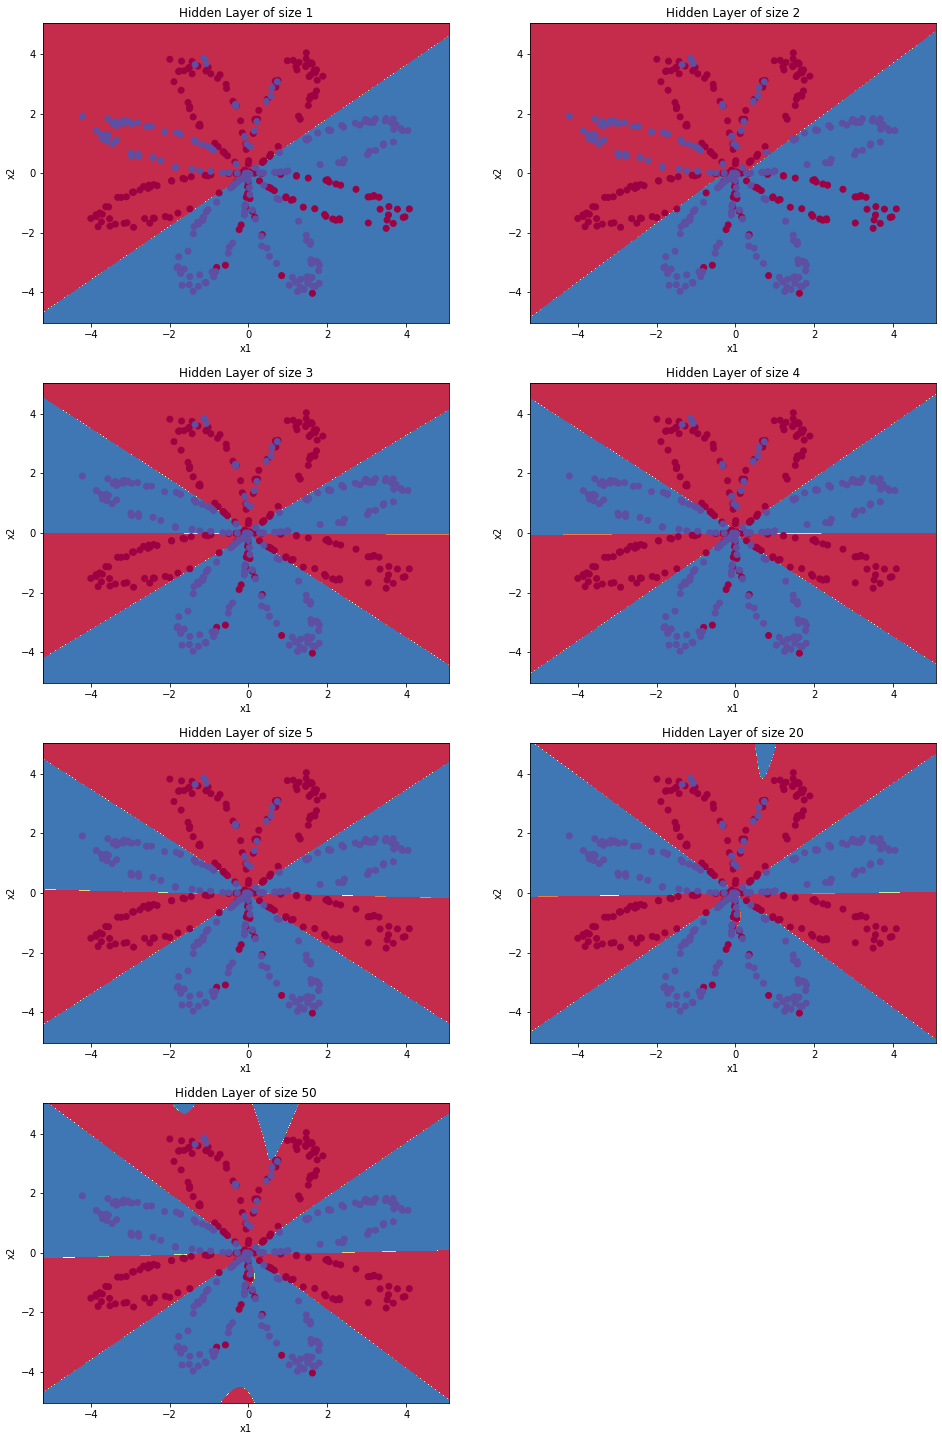

In [50]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

**Interpretation**:
- The larger models (with more hidden units) are able to fit the training set better, until eventually the largest models overfit the data. 
- The best hidden layer size seems to be around n_h = 5. Indeed, a value around here seems to  fit the data well without also incurring noticeable overfitting.
- If we apply regularization, we can use very large models (such as n_h = 50) without much overfitting. 